# Sagar Kumar 210968002
# DSE B Batch 1
# Week 2 - ANN

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
keras = tf.keras
from keras.layers import Dense
from keras import Sequential
from keras.optimizers import Adam
from keras.metrics import Recall, Precision
from sklearn.preprocessing import StandardScaler
import itertools as it
from sklearn.metrics import precision_score, accuracy_score, recall_score

In [2]:
df = pd.read_csv("churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
df.duplicated().any()

False

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df = pd.get_dummies(df, dtype=np.int32)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [8]:
df['Balance'] = df['Balance'].mask(df['Balance'] == 0).fillna(df['Balance'].mean())
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,76485.889288,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.860000,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.800000,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,76485.889288,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.820000,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,76485.889288,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.610000,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,76485.889288,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.310000,2,1,0,92888.52,1,0,1,0,0,1


In [9]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = StandardScaler().fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-0.869761,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,-0.639565,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.745183,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-0.869761,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.671538,-0.911583,1,1,-0.365276,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-0.869761,0.807737,1,0,-0.066419,0,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-1.470759,-0.911583,1,1,0.027988,0,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-0.869761,-0.911583,0,1,-1.008643,1,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.914108,0.807737,1,0,-0.125231,1,0,1,0,0,1


In [10]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-0.869761,-0.911583,1,1,0.021886,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,-0.639565,-0.911583,0,1,0.216534,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.745183,2.527057,1,0,0.240687,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-0.869761,0.807737,0,0,-0.108918,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.671538,-0.911583,1,1,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-0.869761,0.807737,1,0,-0.066419,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-1.470759,-0.911583,1,1,0.027988,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-0.869761,-0.911583,0,1,-1.008643,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.914108,0.807737,1,0,-0.125231,0,1,0,0,1


In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1034,0.129037,0.674932,-0.695982,-0.869761,0.807737,0,1,1.324796,1,0,0,0,1
7994,-1.360899,-1.708908,-1.387538,1.494948,2.527057,1,1,1.218072,0,1,0,1,0
516,-1.888585,1.628468,1.724464,-0.869761,2.527057,0,1,-0.657884,1,0,0,1,0
44,0.097996,2.105236,-0.004426,1.627925,-0.911583,1,1,1.012877,0,0,1,1,0
1406,-0.812520,-1.518201,-1.041760,0.714380,-0.911583,0,1,-0.574709,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.305528,0.770285,0.687130,0.100997,-0.911583,1,1,-0.578897,0,1,0,0,1
7813,0.346319,2.295943,-0.695982,-0.720114,-0.911583,1,0,-0.529442,0,1,0,1,0
905,0.222158,0.579578,1.378686,-0.869761,-0.911583,1,1,-0.140200,1,0,0,1,0
5192,0.129037,0.007457,1.032908,-0.869761,0.807737,1,1,0.018757,1,0,0,1,0


In [14]:
dims = X_train.shape[1]
dims

13

In [15]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

2023-09-17 11:29:47.743614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 11:29:47.801094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 11:29:47.801198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 11:29:47.814877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 11:29:47.815027: I tensorflow/compile

In [16]:
models = list(it.repeat([
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(1, activation='sigmoid', input_shape=(dims,)),
    ]),
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(64, activation='relu', input_shape=(dims,)),
        Dense(1, activation='sigmoid', input_shape=(dims,)),
    ]),
    Sequential([
        Dense(128, activation='relu', input_shape=(dims,)),
        Dense(64, activation='relu', input_shape=(dims,)),
        Dense(32, activation='relu', input_shape=(dims,)),
        Dense(1, activation='sigmoid', input_shape=(dims,)),
    ]),
], 9))
models

[[<keras.src.engine.sequential.Sequential at 0x7fa537a80dd0>,

In [17]:
batch_size = 32
epochs = [10, 20, 30]
learning_rate = [0.1, 0.01, 0.001]

In [18]:
for i in models:
    for j in range(len(i)):
        i[j].compile(optimizer=Adam(learning_rate=learning_rate[j]), loss='binary_crossentropy', metrics=['accuracy', Recall(), Precision()])

In [19]:
print(X_train.shape)
print(y_train.shape)

(8500, 13)
(8500,)


In [20]:
trains = [
    i[j].fit(X_train, y_train, epochs=epochs[j], batch_size=batch_size, validation_split=0.15) for j in range(len(i)) for i in models
]

Epoch 1/10


2023-09-17 11:29:51.682553: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa418300140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 11:29:51.682623: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-09-17 11:29:51.692747: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-17 11:29:51.720635: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-17 11:29:52.072064: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-17 11:29:52.179783: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


226/226 [==============================] - 5s 13ms/step - loss: 0.4256 - accuracy: 0.8251 - recall_24: 0.3223 - precision_24: 0.6278 - val_loss: 0.3638 - val_accuracy: 0.8431 - val_recall_24: 0.3425 - val_precision_24: 0.7250
Epoch 2/10
226/226 [==============================] - 3s 12ms/step - loss: 0.3821 - accuracy: 0.8444 - recall_24: 0.3753 - precision_24: 0.7175 - val_loss: 0.3709 - val_accuracy: 0.8345 - val_recall_24: 0.1850 - val_precision_24: 0.9216
Epoch 3/10
226/226 [==============================] - 3s 14ms/step - loss: 0.3753 - accuracy: 0.8493 - recall_24: 0.3821 - precision_24: 0.7453 - val_loss: 0.3373 - val_accuracy: 0.8580 - val_recall_24: 0.4016 - val_precision_24: 0.7786
Epoch 4/10
226/226 [==============================] - 3s 14ms/step - loss: 0.3686 - accuracy: 0.8534 - recall_24: 0.3835 - precision_24: 0.7750 - val_loss: 0.3504 - val_accuracy: 0.8557 - val_recall_24: 0.3583 - val_precision_24: 0.8125
Epoch 5/10
226/226 [==============================] - 3s 12ms/s

In [21]:
tlosses = [i.history['loss'] for i in trains]
tlosses

[[0.4255877137184143,
  0.3820585608482361,
  0.3753347396850586,
  0.3685567378997803,
  0.3694719672203064,
  0.3713645935058594,
  0.3668367266654968,
  0.3714447021484375,
  0.3709644377231598,
  0.37807661294937134],
 [0.3728856146335602,
  0.36672645807266235,
  0.3694238066673279,
  0.37203729152679443,
  0.3803788423538208,
  0.36903154850006104,
  0.38231712579727173,
  0.37725508213043213,
  0.37446266412734985,
  0.3759540617465973],
 [0.3675374984741211,
  0.3767806589603424,
  0.3780883848667145,
  0.38319066166877747,
  0.38039398193359375,
  0.3712693154811859,
  0.37399914860725403,
  0.37132811546325684,
  0.3743784427642822,
  0.37295734882354736],
 [0.3769306242465973,
  0.3745732307434082,
  0.37748804688453674,
  0.37656110525131226,
  0.3754459619522095,
  0.37743207812309265,
  0.36558282375335693,
  0.37810423970222473,
  0.3653971254825592,
  0.3722970187664032],
 [0.37282586097717285,
  0.3806198537349701,
  0.3780893385410309,
  0.37468263506889343,
  0.37825

In [22]:
vlosses = [i.history['val_loss'] for i in trains]
vlosses

[[0.3638199269771576,
  0.3709318935871124,
  0.33734580874443054,
  0.35035207867622375,
  0.38475972414016724,
  0.36818259954452515,
  0.34914764761924744,
  0.35711774230003357,
  0.3724029064178467,
  0.3761748969554901],
 [0.365268737077713,
  0.36253082752227783,
  0.3634669780731201,
  0.3722485899925232,
  0.3695332705974579,
  0.38786450028419495,
  0.3849281370639801,
  0.37264785170555115,
  0.36281436681747437,
  0.3624752461910248],
 [0.39528244733810425,
  0.3756754696369171,
  0.3684670031070709,
  0.37044090032577515,
  0.38469693064689636,
  0.3757268786430359,
  0.37848159670829773,
  0.37095099687576294,
  0.36704954504966736,
  0.3837110698223114],
 [0.3757149279117584,
  0.3887430727481842,
  0.36808618903160095,
  0.382318913936615,
  0.3717934191226959,
  0.3899742066860199,
  0.37221258878707886,
  0.39498400688171387,
  0.3757871687412262,
  0.3720857799053192],
 [0.39782285690307617,
  0.364641398191452,
  0.3777366578578949,
  0.42111796140670776,
  0.382521

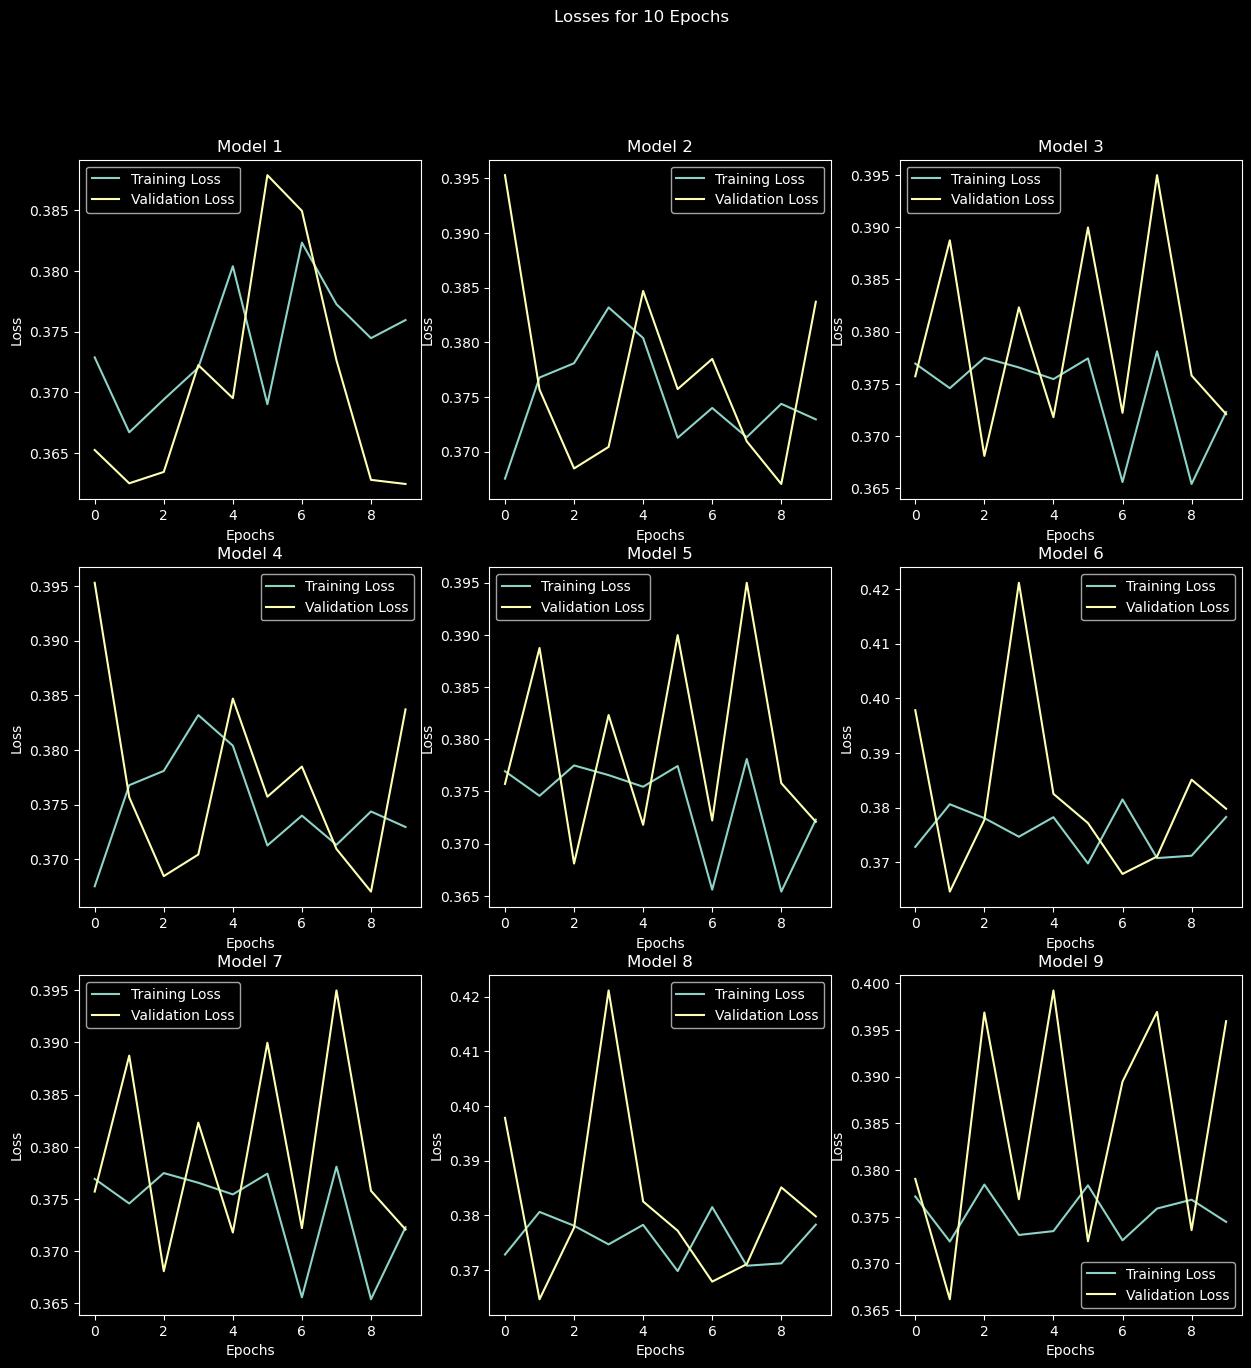

In [33]:
epoch_index = 0
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Losses for 10 Epochs')

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[1 + j + k], label='Training Loss')
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[1 + j + k], label='Validation Loss')
        axs[j, k].set_xlabel('Epochs')
        axs[j, k].set_ylabel('Loss')
        axs[j, k].set_title(f'Model {j*3+k+1}')
        axs[j, k].legend()

        

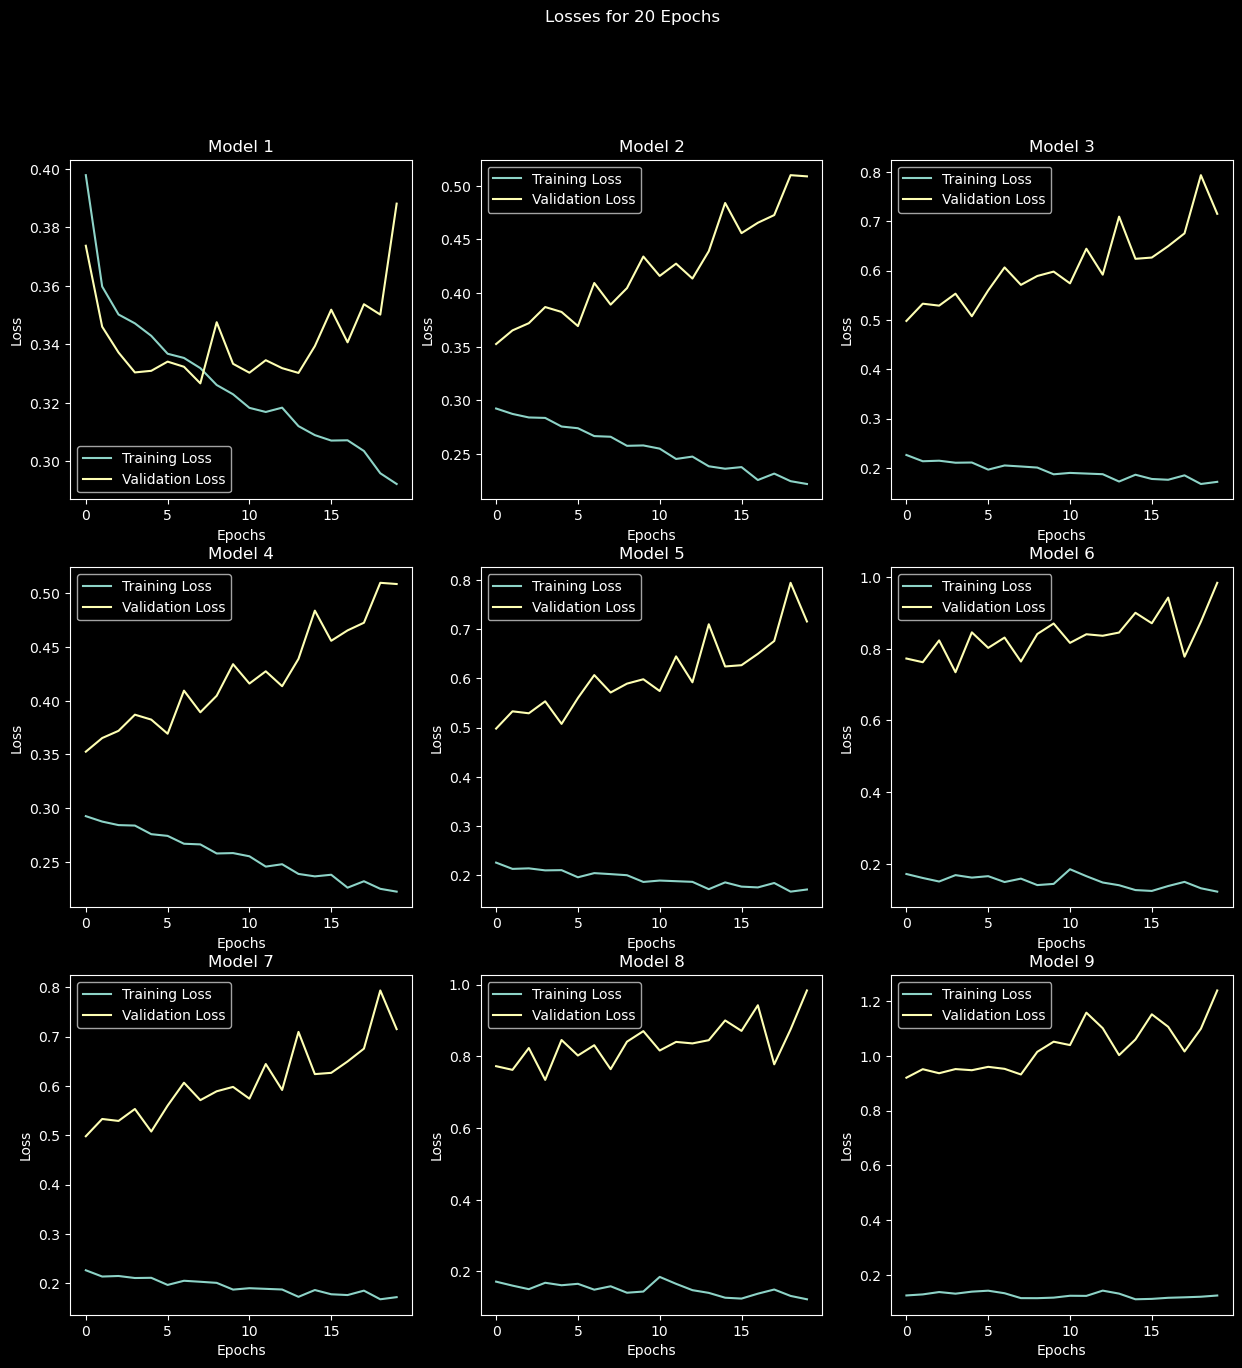

In [35]:
epoch_index = 1
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Losses for 20 Epochs')

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[9 + j + k], label='Training Loss')
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[9 + j + k], label='Validation Loss')
        axs[j, k].set_xlabel('Epochs')
        axs[j, k].set_ylabel('Loss')
        axs[j, k].set_title(f'Model {j*3+k+1}')
        axs[j, k].legend()
        

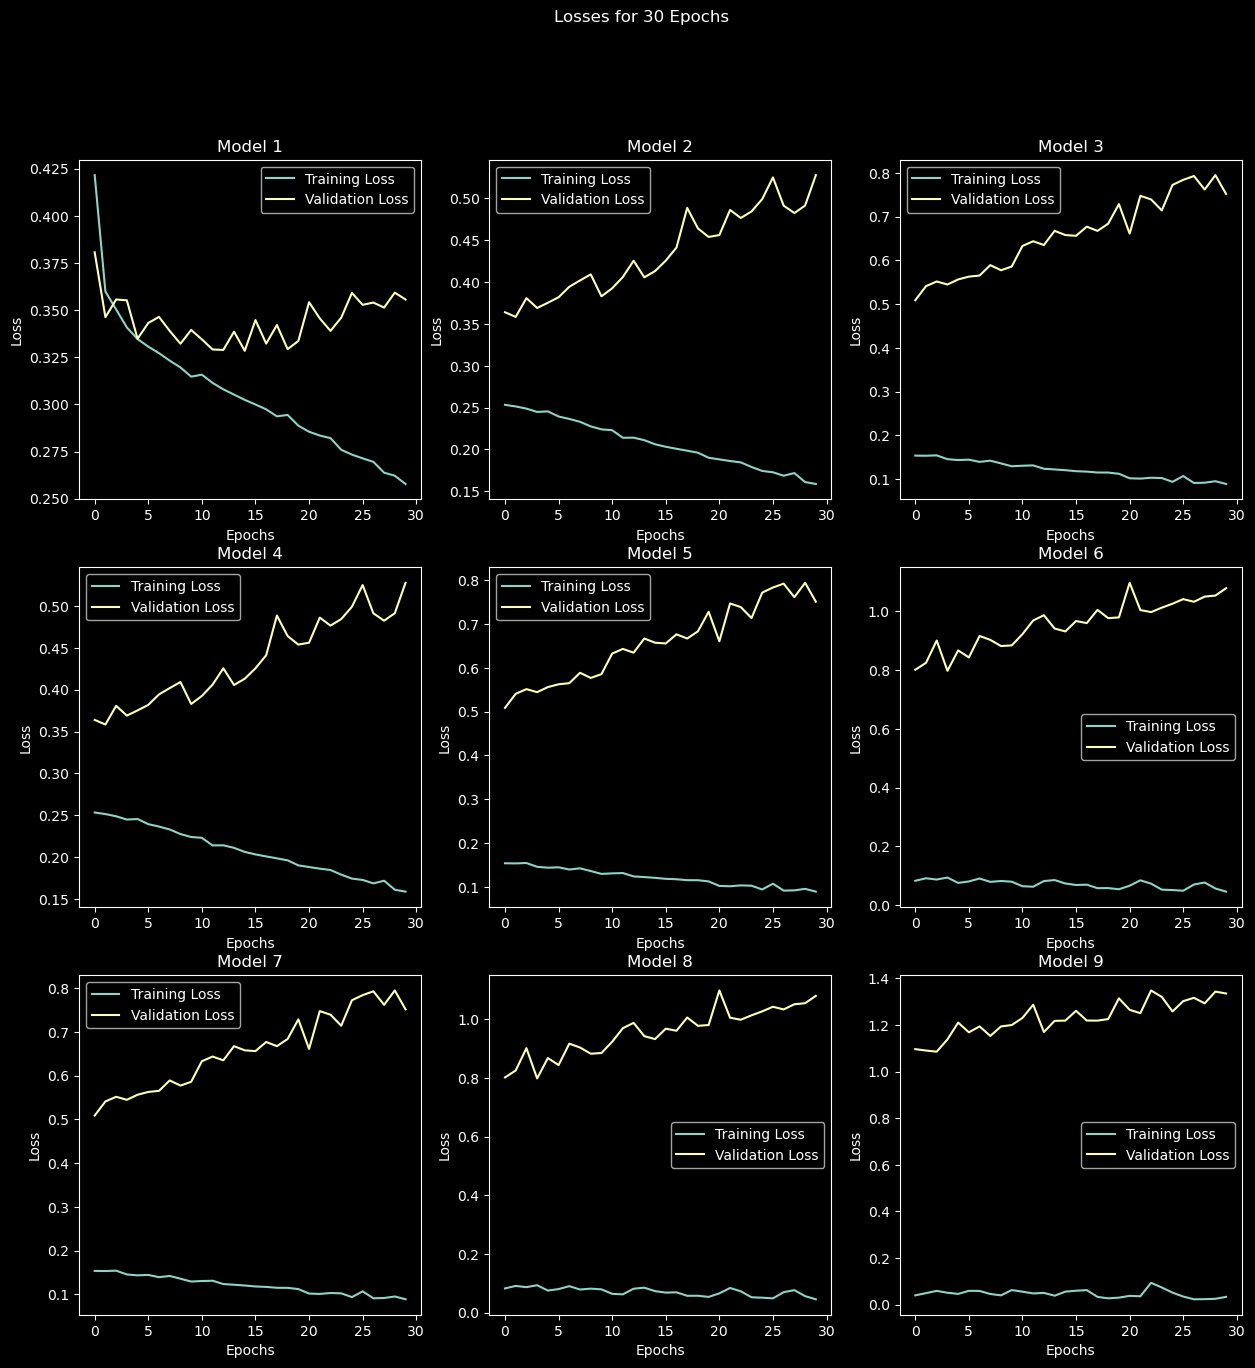

In [36]:
epoch_index = 2
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Losses for 30 Epochs')

for j in range(3):
    for k in range(3):
        axs[j, k].plot(range(epochs[epoch_index]), tlosses[18 + j + k], label='Training Loss')
        axs[j, k].plot(range(epochs[epoch_index]), vlosses[18 + j + k], label='Validation Loss')
        axs[j, k].set_xlabel('Epochs')
        axs[j, k].set_ylabel('Loss')
        axs[j, k].set_title(f'Model {j*3+k+1}')
        axs[j, k].legend()
        

### Evaluation

In [26]:
k = 1
for i in range(9):
  for model in models[i]:
    loss, accuracy, recall, precision = model.evaluate(X_test,y_test)
    print(f"model: {k} --> loss: {loss}, accuracy: {accuracy}, recall: {recall}, precision: {precision}")
    k += 1

47/47 [==============================] - 0s 8ms/step - loss: 0.3766 - accuracy: 0.8373 - recall_24: 0.2774 - precision_24: 0.9286
model: 1 --> loss: 0.37656500935554504, accuracy: 0.8373333215713501, recall: 0.27743902802467346, precision: 0.9285714030265808
47/47 [==============================] - 0s 8ms/step - loss: 1.8512 - accuracy: 0.7953 - recall_25: 0.4848 - precision_25: 0.5354
model: 2 --> loss: 1.8511521816253662, accuracy: 0.7953333258628845, recall: 0.48475611209869385, precision: 0.5353535413742065
47/47 [==============================] - 0s 8ms/step - loss: 2.0248 - accuracy: 0.8053 - recall_26: 0.5091 - precision_26: 0.5604
model: 3 --> loss: 2.02481746673584, accuracy: 0.8053333163261414, recall: 0.5091463327407837, precision: 0.5604026913642883
47/47 [==============================] - 0s 8ms/step - loss: 0.3766 - accuracy: 0.8373 - recall_24: 0.2774 - precision_24: 0.9286
model: 4 --> loss: 0.37656500935554504, accuracy: 0.8373333215713501, recall: 0.27743902802467346,

In [27]:
acc = []
rec = []
prec = []
for i in range(9):
  for model in models[i]:
    y_pred = model.predict(X_test)
    labels = np.where(y_pred > 0.5, 1, 0)
    acc.append(accuracy_score(y_test, labels))
    rec.append(recall_score(y_test, labels))
    prec.append(precision_score(y_test, labels))

47/47 [==============================] - 0s 2ms/step


In [28]:
pd.DataFrame({
    "Model": range(1, 28),
    "Accuracy": acc,
    "Recall": rec,
    "Precision": prec
})

,Model,Accuracy,Recall,Precision
0,1,0.837333,0.277439,0.928571
1,2,0.795333,0.484756,0.535354
2,3,0.805333,0.509146,0.560403
3,4,0.837333,0.277439,0.928571
4,5,0.795333,0.484756,0.535354
5,6,0.805333,0.509146,0.560403
6,7,0.837333,0.277439,0.928571
7,8,0.795333,0.484756,0.535354
8,9,0.805333,0.509146,0.560403
9,10,0.837333,0.277439,0.928571
